In [1]:
import os, sys
sys.path.append(".")
import pandas as pd
import os
import tarfile
import json
import math
from datetime import datetime
from copy import copy
import pandas as pd
import _pickle as cPickle
import traceback
import gzip
import shutil
from pathlib import Path

bucket_name = "binance-orderbook-data"
prefix = "packet_history_by_symbol"
PACKET_RAW_DIR = Path("/Volumes/AdamDrive/binance_data/data/futures/um/packet_raw")
DEPTH_RAW_DIR = Path("/Volumes/AdamDrive/binance_data/data/futures/um/book_snapshot_25")
TICK_PARSED_DIR = Path("/Volumes/AdamDrive/binance_data/data/futures/um/tick_parsed")
TRADES_DIR = Path("/Volumes/AdamDrive/binance_data/data/futures/um/daily/trades")

In [21]:
symbol = 'btcusdt'
date = '2023-01-01'
path = TICK_PARSED_DIR / symbol.upper() / f"{date}.pd_pkl"


In [6]:
raw_depth_25_data_p = "binance-futures_book_snapshot_25_{}_{}.csv".format(date, symbol.upper())
!gzip -d -k -f {DEPTH_RAW_DIR / symbol.upper() / raw_depth_25_data_p}

In [7]:

raw_depth_25_data = pd.read_csv(DEPTH_RAW_DIR / symbol.upper() / raw_depth_25_data_p)
raw_depth_25_data["time"] = pd.to_datetime(raw_depth_25_data['timestamp'], unit='us')
raw_depth_25_data = raw_depth_25_data.set_index("time")

In [12]:
zipped_file = TRADES_DIR / symbol.upper() / f"{symbol.upper()}-trades-{date}.zip"
zipped_folder = TRADES_DIR / symbol.upper()
!unzip -nq {zipped_file} -d {zipped_folder}

In [17]:
raw_trades_path = TRADES_DIR / symbol.upper() / f"{symbol.upper()}-trades-{date}.csv"
trades_data = pd.read_csv(raw_trades_path, header=0)

In [18]:
trades_data.head()

,id,price,qty,quote_qty,time,is_buyer_maker
0,3166744581,16537.5,0.004,66.15,1672531204118,True
1,3166744582,16537.6,0.116,1918.36,1672531204178,False
2,3166744583,16537.6,0.034,562.27,1672531204178,False
3,3166744584,16537.6,0.082,1356.08,1672531204198,False
4,3166744585,16537.5,0.002,33.07,1672531204209,True


In [19]:
trades_data["time"] = pd.to_datetime(trades_data['time'], unit='ms')
trades_data = trades_data.set_index("time")

In [24]:
parsed_tick_df = pd.read_pickle(path)
parsed_tick_df['time'] = pd.to_datetime(parsed_tick_df["time"])
parsed_tick_df = parsed_tick_df.set_index('time')

## Check Price

<AxesSubplot:xlabel='time'>

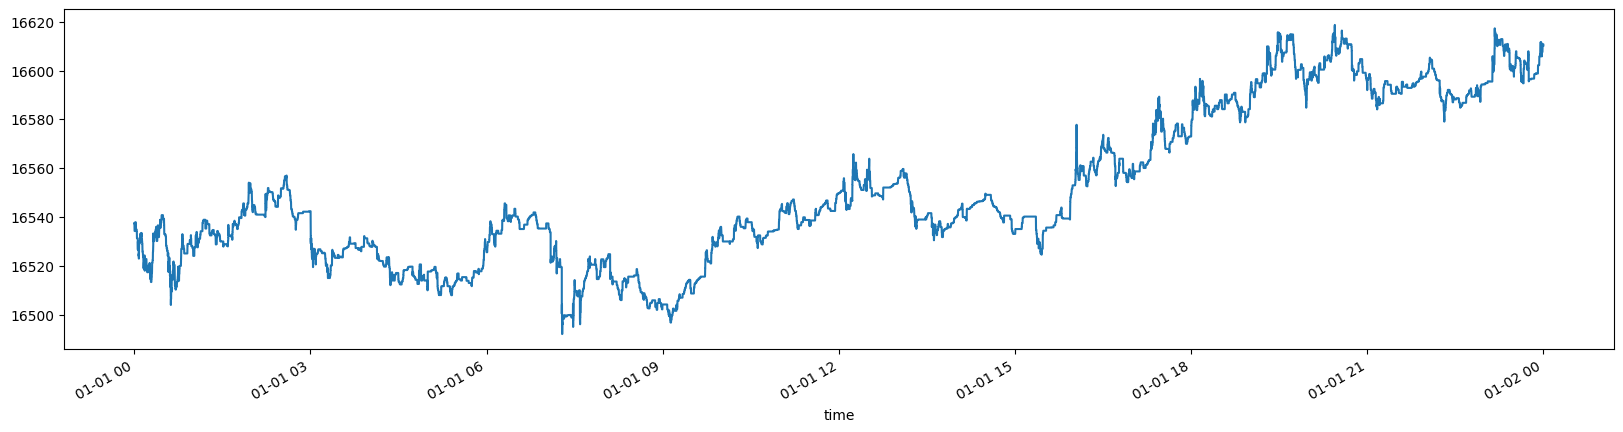

In [25]:
parsed_tick_df["bid_0_p"].plot(figsize=(20, 5))

<AxesSubplot:xlabel='time'>

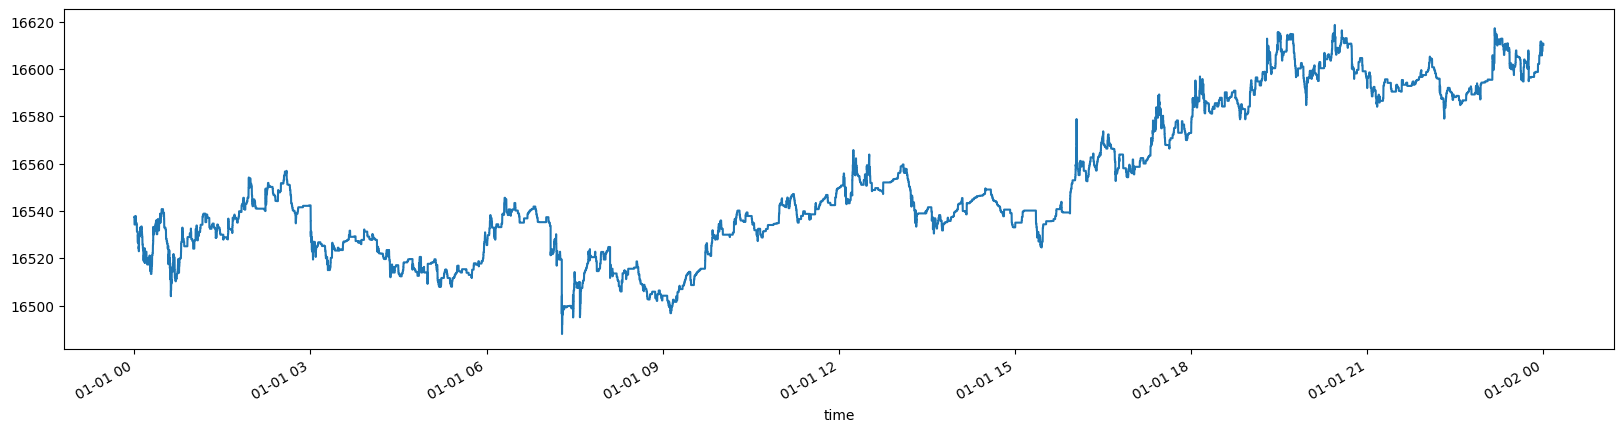

In [26]:
raw_depth_25_data["bids[0].price"].plot(figsize=(20, 5))

In [48]:
parsed_tick_df.iloc[0:10, -15:]

,bid_18_v,ask_19_p,ask_19_v,bid_19_p,bid_19_v,good,pack_lost,trades,price,qty,quote_qty,active.buy.qty,active.sell.qty,active.buy.quote_qty,active.sell.quote_qty
time,,,,,,,,,,,,,,,
2023-01-01 00:00:00.067000+00:00,0.826,16539.6,0.323,16534.8,3.125,True,False,0,NaN,0.000,0.0000,0,0.000,0,0.0000
2023-01-01 00:00:03.004000+00:00,0.826,16539.6,0.323,16534.8,3.125,True,False,0,NaN,0.000,0.0000,0,0.000,0,0.0000
2023-01-01 00:00:05.609000+00:00,3.125,16539.6,0.323,16534.7,4.437,True,False,74,16537.567929,10.165,168104.3780,0,10.165,0,168104.3780
2023-01-01 00:00:06.226000+00:00,4.497,16539.6,0.323,16534.6,2.284,True,False,5,16537.523136,0.523,8649.1246,0,0.523,0,8649.1246
2023-01-01 00:00:06.733000+00:00,2.086,16539.6,2.002,16534.8,0.556,True,False,33,16537.592882,8.781,145216.6031,0,8.781,0,145216.6031
2023-01-01 00:00:07.257000+00:00,0.242,16539.6,0.324,16535.0,1.156,True,False,16,16537.500000,6.581,108833.2875,0,6.581,0,108833.2875
2023-01-01 00:00:07.762000+00:00,0.030,16539.5,0.719,16535.1,0.242,True,False,6,16537.562078,0.741,12254.3335,0,0.741,0,12254.3335
2023-01-01 00:00:08.272000+00:00,0.242,16539.5,0.719,16535.0,2.173,True,False,7,16537.502794,0.501,8285.2889,0,0.501,0,8285.2889
2023-01-01 00:00:08.781000+00:00,1.353,16538.9,0.005,16534.3,0.539,True,False,108,16537.332424,25.176,416343.8811,0,25.176,0,416343.8811


In [47]:
trades_data.iloc[:10]

,id,price,qty,quote_qty,is_buyer_maker
time,,,,,
2023-01-01 00:00:04.118,3166744581,16537.5,0.004,66.15,True
2023-01-01 00:00:04.178,3166744582,16537.6,0.116,1918.36,False
2023-01-01 00:00:04.178,3166744583,16537.6,0.034,562.27,False
2023-01-01 00:00:04.198,3166744584,16537.6,0.082,1356.08,False
2023-01-01 00:00:04.209,3166744585,16537.5,0.002,33.07,True
2023-01-01 00:00:04.211,3166744586,16537.5,0.077,1273.38,True
2023-01-01 00:00:04.211,3166744587,16537.5,0.012,198.45,True
2023-01-01 00:00:04.211,3166744588,16537.5,0.031,512.66,True
2023-01-01 00:00:04.211,3166744589,16537.5,0.053,876.48,True


In [46]:
raw_depth_25_data.iloc[0:5, -23:-19]

,asks[19].amount,bids[19].price,bids[19].amount,asks[20].price
time,,,,
2023-01-01 00:00:00.067,0.323,16534.8,3.125,16539.7
2023-01-01 00:00:03.004,0.323,16534.8,3.125,16539.7
2023-01-01 00:00:03.132,0.323,16534.7,4.437,16539.7
2023-01-01 00:00:05.609,0.323,16534.7,4.437,16539.7
2023-01-01 00:00:06.226,0.323,16534.6,2.284,16539.7
